In [1]:
import re
import pyrfume
import pandas as pd

In [2]:
interesting = '''arctander_1960 human, odorCharacter
aromadb human, odorCharacter
dravnieks_1985 human, odorCharacter, academic
foodb human, odorCharacter
goodscents human, odorCharacter
ifra_2019 human, odorCharacter
keller_2012 human, intensity, pleasantness, odorCharacter, threshold, academic
keller_2016 human, intensity, pleasantness, familiarity, odorCharacter, academic
leffingwell human, odorCharacter
nat_geo_1986 human, odorCharacter
sharma_2021a odorCharacter
sharma_2021b human, odorCharacter
sigma_2014 human, odorCharacter
snitz_2019 human, intensity, odorCharacter, academic'''

In [3]:
interesting_dataset = [x.split(' ')[0] for x in interesting.split('\n')]
interesting_dataset

['arctander_1960',
 'aromadb',
 'dravnieks_1985',
 'foodb',
 'goodscents',
 'ifra_2019',
 'keller_2012',
 'keller_2016',
 'leffingwell',
 'nat_geo_1986',
 'sharma_2021a',
 'sharma_2021b',
 'sigma_2014',
 'snitz_2019']

In [4]:
dataset = 'arctander_1960'
behavior = pyrfume.load_data(dataset + '/behavior_1_sparse.csv')
molecules = pyrfume.load_data(dataset + '/molecules.csv')
stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [5]:
all = stimuli.join(behavior)
all = pd.merge(all, molecules, left_on='new_CID', right_index=True)
all.rename({'new_CID':'CID', 'Labels': 'descriptors_'+dataset}, axis=1, inplace=True)
all = all[['CID', 'CAS', 'name', 'descriptors_'+dataset]]
total = all
all

,CID,CAS,name,descriptors_arctander_1960
Stimulus,,,,
1,10569,514-10-3,abietic acid,NaN
2,101602,26266-77-3,dihydroabietyl alcohol,woody;pine
3,177,75-07-0,acetaldehyde,winey;ethereal
4,22235151,7492-39-9,benzyl methoxyethyl acetal,green;fruity
5,83036,13002-09-0,13002-09-0,green;oily
...,...,...,...,...
3097,12966232,NaN,"1,6-dimethyl-7-oxabicyclo[4.1.0]hepta-2,4-diene",almond
3098,10687,NaN,"2,3-dimethylphenol",NaN
3100,33942,NaN,"2-(2,6-dimethylphenyl)ethanol",rose;balsamic;floral


In [6]:
dataset = 'aromadb'
behavior = pyrfume.load_data(dataset + '/behavior.csv')
molecules = pyrfume.load_data(dataset + '/molecules.csv')
stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [7]:
all = stimuli.join(behavior)
all = pd.merge(all, molecules, left_on='CID', right_index=True)
all.rename({'Filtered Descriptors': 'descriptors_'+dataset}, axis=1, inplace=True)
all = all[['CID', 'name', 'descriptors_'+dataset]]
all

,CID,name,descriptors_aromadb
Stimulus,,,
49,49,3-methyl-2-oxobutanoic acid,fruity
107,107,hydrocinnamic acid,balsamic
126,126,4-hydroxybenzaldehyde,nutty
176,176,acetic acid,sour
177,177,acetaldehyde,ethereal
...,...,...,...
91187616,91187616,"undecane-2,4,7,8-tetrone",butter;sweet
91554343,91554343,"(1S,6R)-1-methyl-4-prop-1-en-2-yl-7-oxabicyclo...",spicy
91746537,91746537,alloaromadendrene,fruity


In [8]:
total = pd.merge(total, all, how='outer')
len(total)

3296

In [9]:
# dataset = 'dravnieks_1985'
# behavior = pyrfume.load_data(dataset + '/behavior_2.csv')
# molecules = pyrfume.load_data(dataset + '/molecules.csv')
# stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [10]:
# all = stimuli.join(behavior)
# all = pd.merge(all, molecules, left_on='CID', right_index=True)
# all#[['CID', 'CAS', 'Name', 'Filtered Descriptors']]

In [11]:
# dataset = 'foodb'
# behavior = pyrfume.load_data(dataset + '/behavior.csv')
# molecules = pyrfume.load_data(dataset + '/molecules.csv')
# stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [12]:
dataset = 'goodscents'
behavior = pyrfume.load_data(dataset + '/behavior.csv')
molecules = pyrfume.load_data(dataset + '/molecules.csv')
stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [13]:
all = stimuli.join(behavior)
all = pd.merge(all, molecules, left_on='CID', right_index=True)
all.rename({'Descriptors': 'descriptors_'+dataset}, axis=1, inplace=True)
all = all[['CID', 'descriptors_'+dataset]]
all

,CID,descriptors_goodscents
Stimulus,,
100-06-1,7476,sweet;vanilla;cherry maraschino cherry;powdery...
100-09-4,7478,phenolic;animal;fecal;medicinal
100-42-5,7501,sweet;plastic;floral;balsamic
100-51-6,244,sweet;floral;rose;fruity;phenolic;balsamic;che...
100-52-7,240,sweet;cherry;cherry maraschino cherry;nutty;fr...
...,...,...
NF0802,11564539,flowers;orange
NF0803,46195361,vegetable;floral;fruity;apricot;green;tropical...
NF0804,46195364,spicy;leafy;peppery;banana;fruity;oily;cantalo...


In [14]:
total = pd.merge(total, all, left_on='CID', right_on='CID', how='outer')

In [15]:
dataset = 'ifra_2019'
behavior = pyrfume.load_data(dataset + '/behavior.csv')
molecules = pyrfume.load_data(dataset + '/molecules.csv')
stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [16]:
all = stimuli.join(behavior)
all = pd.merge(all, molecules, left_on='CID', right_index=True)
all['descriptors_'+dataset] = all[['Descriptor 1', 'Descriptor 2', 'Descriptor 3']].apply(
    lambda x: ';'.join(x.dropna().astype(str)).lower(),
    axis=1
)
all = all[['CID', 'name', 'descriptors_'+dataset]]
all

,CID,name,descriptors_ifra_2019
Stimulus,,,
107,107,hydrocinnamic acid,floral;sweet;spicy
177,177,acetaldehyde,fruity;apple;aldehydic
179,179,acetoin,food like;buttery;milky
243,243,benzoic acid,herbal;balsamic;powdery
261,261,butyraldehyde,gourmand;fruity;chocolate
...,...,...,...
92043553,92043553,jasmine oil,floral;sweet;jasmin
92043553,92043553,jasmine oil,floral;sweet;jasmin
92043557,92043557,methylcyclopentadecenone,powdery;warm;musk like


In [17]:
total = pd.merge(total, all, how='outer')

In [18]:
dataset = 'flavornet'
behavior = pyrfume.load_data(dataset + '/behavior.csv')
molecules = pyrfume.load_data(dataset + '/molecules.csv')
stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [19]:
all = stimuli.join(behavior)
all = pd.merge(all, molecules, left_on='CID', right_index=True)
all.rename({'Descriptors': 'descriptors_'+dataset}, axis=1, inplace=True)
all = all[['CID', 'name', 'descriptors_'+dataset]]
all

,CID,name,descriptors_flavornet
Stimulus,,,
107,107,hydrocinnamic acid,balsamic
176,176,acetic acid,sour
177,177,acetaldehyde,pungent;ether
179,179,acetoin,cream;butter
240,240,benzaldehyde,burnt sugar;almond
...,...,...,...
71430727,71430727,94268-57-2,turpentine
85981774,85981774,1-octen-3-hydroperoxide,metal;mushroom
86064872,86064872,pinenol,dust;must


In [20]:
total = pd.merge(total, all, how='outer')
total

,CID,CAS,name,descriptors_arctander_1960,descriptors_aromadb,descriptors_goodscents,descriptors_ifra_2019,descriptors_flavornet
0,10569,514-10-3,abietic acid,NaN,NaN,acetic;mild,NaN,NaN
1,101602,26266-77-3,dihydroabietyl alcohol,woody;pine,NaN,woody;mild,NaN,NaN
2,177,75-07-0,acetaldehyde,winey;ethereal,ethereal,musty;aldehydic;fruity;fresh;ethereal;pungent,fruity;apple;aldehydic,pungent;ether
3,22235151,7492-39-9,benzyl methoxyethyl acetal,green;fruity,fruity,sweet;fruity;green,NaN,NaN
4,83036,13002-09-0,13002-09-0,green;oily,NaN,fermented;fruity;green;ethereal;alcoholic,NaN,NaN
...,...,...,...,...,...,...,...,...
7372,71430727,NaN,94268-57-2,NaN,NaN,NaN,NaN,turpentine
7373,85981774,NaN,1-octen-3-hydroperoxide,NaN,NaN,NaN,NaN,metal;mushroom
7374,86064872,NaN,pinenol,NaN,NaN,NaN,NaN,dust;must
7375,129830062,NaN,beta-farnesol,NaN,NaN,NaN,NaN,oil;flower


In [21]:
dataset = 'leffingwell'
behavior = pyrfume.load_data(dataset + '/behavior_sparse.csv')
molecules = pyrfume.load_data(dataset + '/molecules.csv')
stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [22]:
all = stimuli.join(behavior)
all = pd.merge(all, molecules, left_on='CID', right_index=True)
all.rename({'cas': 'CAS', 'name_x': 'name'}, axis=1, inplace=True)
all['descriptors_'+dataset] = all['Labels'].apply(lambda x: re.sub('[[\]\']', '', x).replace(', ', ';'))
all = all[['CID', 'CAS', 'name', 'descriptors_'+dataset]][all['CID']>0]
all

/var/folders/1p/7266x_bx2bv6hyhd2_k8nt8m0000gn/T/ipykernel_56534/3298069277.py:4: FutureWarning: Possible nested set at position 1
  all['descriptors_'+dataset] = all['Labels'].apply(lambda x: re.sub('[[\]\']', '', x).replace(', ', ';'))


,CID,CAS,name,descriptors_leffingwell
Stimulus,,,,
4,4,78-96-8,1-aminopropan-2-ol,fishy
58,58,600-18-0,2-oxobutanoic acid,creamy;caramellic;fatty;sweet
98,98,2464-23-5,3-mercaptopyruvic acid,sulfurous;meaty;cheesy
101,101,100-83-4,3-hydroxybenzaldehyde,phenolic;medicinal;aromatic;sweet
107,107,501-52-0,hydrocinnamic acid,balsamic;sweet
...,...,...,...,...
154241350,154241350,53897-58-5,"4,4,5-triethyltrithiane",green;alliaceous;savory;onion
155323379,155323379,7529-06-8,schembl22694105,roasted;alliaceous;savory;sulfurous
158699780,158699780,127931-21-9,O-(2-methylpropyl) 2-methylbutanethioate,ripe;creamy;fruity;tropical;strawberry;sulfuro...


In [23]:
total = pd.merge(total, all, how='outer')

In [24]:
# dataset = 'sharma_2021a'
# behavior = pyrfume.load_data(dataset + '/behavior.csv')
# molecules = pyrfume.load_data(dataset + '/molecules.csv')
# stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [25]:
# all = stimuli.join(behavior)
# all = pd.merge(all, molecules, left_on='CID', right_index=True)
# all[['CID', 'name', 'Decriptors']]

In [26]:
# dataset = 'sharma_2021b'
# behavior = pyrfume.load_data(dataset + '/behavior_1.csv')
# molecules = pyrfume.load_data(dataset + '/molecules.csv')
# stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [27]:
# all = stimuli.join(behavior)
# all = pd.merge(all, molecules, left_on='CID', right_index=True)
# all[['CID', 'name', 'Primary Odor']]

In [28]:
dataset = 'sigma_2014'
behavior = pyrfume.load_data(dataset + '/behavior_sparse.csv')
molecules = pyrfume.load_data(dataset + '/molecules.csv')
stimuli = pyrfume.load_data(dataset + '/stimuli.csv')

In [29]:
all = stimuli.join(behavior)
all = pd.merge(all, molecules, left_index=True, right_index=True)
all['CID'] = all.index
all['descriptors_'+dataset] = all['descriptors'].apply(lambda x: re.sub('[[\]\']', '', x).replace(', ', ';'))

all = all[['CID', 'CAS', 'name', 'descriptors_'+dataset]]
all

,CID,CAS,name,descriptors_sigma_2014
58,58,600-18-0,2-oxobutanoic acid,caramel;creamy
107,107,501-52-0,hydrocinnamic acid,rose;sweet
126,126,123-08-0,4-hydroxybenzaldehyde,lily;sweet
135,135,99-96-7,4-hydroxybenzoic acid,caramel
176,176,64-19-7,acetic acid,apple;ethereal
...,...,...,...,...
44134940,44134940,6381-91-5,calcium saccharin,lemon;musty;oily;fruity;rose;sweet
54675810,54675810,89-65-6,erythorbic acid,vanilla;woody
55251157,55251157,67952-65-2,67952-65-2,almond;caramel;musty;vegetable
91001317,91001317,8030-89-5,"pyroligneous acids, reaction products with et ...",whiskey;wine-like


In [30]:
total = pd.merge(total, all, how='outer')

In [31]:
total 

,CID,CAS,name,descriptors_arctander_1960,descriptors_aromadb,descriptors_goodscents,descriptors_ifra_2019,descriptors_flavornet,descriptors_leffingwell,descriptors_sigma_2014
0,10569,514-10-3,abietic acid,NaN,NaN,acetic;mild,NaN,NaN,NaN,NaN
1,101602,26266-77-3,dihydroabietyl alcohol,woody;pine,NaN,woody;mild,NaN,NaN,NaN,NaN
2,177,75-07-0,acetaldehyde,winey;ethereal,ethereal,musty;aldehydic;fruity;fresh;ethereal;pungent,fruity;apple;aldehydic,pungent;ether,nutty;alcoholic;pungent,ethereal
3,22235151,7492-39-9,benzyl methoxyethyl acetal,green;fruity,fruity,sweet;fruity;green,NaN,NaN,NaN,NaN
4,83036,13002-09-0,13002-09-0,green;oily,NaN,fermented;fruity;green;ethereal;alcoholic,NaN,NaN,alcoholic;ethereal;green;fermented;vegetable,NaN
...,...,...,...,...,...,...,...,...,...,...
10713,24847856,9036-66-2,galactoarabinan,NaN,NaN,NaN,NaN,NaN,NaN,spicy
10714,44134940,6381-91-5,calcium saccharin,NaN,NaN,NaN,NaN,NaN,NaN,lemon;musty;oily;fruity;rose;sweet
10715,55251157,67952-65-2,67952-65-2,NaN,NaN,NaN,NaN,NaN,NaN,almond;caramel;musty;vegetable
10716,91001317,8030-89-5,"pyroligneous acids, reaction products with et ...",NaN,NaN,NaN,NaN,NaN,NaN,whiskey;wine-like


In [71]:
props = 'descriptors_arctander_1960	descriptors_aromadb	descriptors_goodscents	descriptors_ifra_2019	descriptors_flavornet	descriptors_leffingwell	descriptors_sigma_2014'.split('	')

all_props = []
map_props = []
for p in props:
    current = ';'.join(total[total[p].notna()][p].tolist()).split(';')
    all_props += current
    map_props += [{'descriptor': c, 'source' : p.replace('descriptors_', '')} for c in set(current)]
#all_props

In [72]:
dataset = 'dravnieks_1985'
behavior = pyrfume.load_data(dataset + '/behavior_2.csv')
cols = [c.lower() for c in behavior.columns]
map_props += [{'descriptor': c, 'source' : dataset} for c in set(cols)]

all_props += cols

In [73]:
prop_set = set(all_props)
len(prop_set)

857

In [74]:
df = pd.DataFrame.from_dict(map_props)
df

,descriptor,source
0,ethereal,arctander_1960
1,floral,arctander_1960
2,rooty,arctander_1960
3,ambre,arctander_1960
4,phenolic,arctander_1960
...,...,...
1620,medicinal,dravnieks_1985
1621,sooty,dravnieks_1985
1622,"oak wood,cognac",dravnieks_1985
1623,"herbal, green,cutgrass",dravnieks_1985


In [75]:
!pip install Levenshtein
import Levenshtein as lv
import itertools

In [76]:
for x, y in itertools.combinations(prop_set, 2):
    d = lv.distance(x,y)
    if d < 2:
        print(x, y, d)

rope rose 1
rope ripe 1
whiskey whisky 1
malty malt 1
malty salty 1
caramelic caramellic 1
cooked vegetables cooked vegetable 1
pork cork 1
seedy weedy 1
sweet-pea sweet pea 1
cat fat 1
spice spicy 1
fat flat 1
smoky smoke 1
dried fried 1
rubber rubbery 1
soup soap 1
soup sour 1
soup soupy 1
rosy rose 1
rosy rosey 1
mustard custard 1
peel peely 1
flowery flower 1
flowery flowers 1
leathery leather 1
dill dull 1
bitter butter 1
tart tar 1
pine wine 1
salt malt 1
salt salty 1
camomile chamomile 1
milk milky 1
milk mild 1
wax waxy 1
may hay 1
may bay 1
coffee toffee 1
herbal herba- 1
bread bready 1
must musty 1
must musk 1
must dust 1
ester estery 1
dairy hairy 1
hawthorn hawthorne 1
terpentine turpentine 1
rooty sooty 1
cassie cassia 1
cream creamy 1
painty paint 1
beef beet 1
beef beer 1
beef beefy 1
mutton muttony 1
orange blossom orange-blossom 1
humus hummus 1
rose rosey 1
mothball mothballs 1
woody wood 1
sweat sweaty 1
sweat sweet 1
soap soapy 1
fruity fruit 1
vegatable vegetable 1

In [77]:
mappings = {
    'beef':'beefy',
'beer':'beery',
'black currant':'blackcurrant',
'bread':'bready',
'butter':'buttery',
'chamomile':'camomile',
'caramellic':'caramelic',
'cassia':'cassie',
'cheese':'cheesy',
'citronellal':'citronella',
'cloves':'clove',
'cool':'coal',
'cooked vegetables':'cooked vegetable',
'cream':'creamy',
'dust':'dusty',
'earth':'earthy',
'egg':'eggy',
'ester':'estery',
'fish':'fishy',
'flower':'flowery',
'flowers':'flowery',
'fruit':'fruity',
'garlic)':'garlic',
'goats':'goaty',
'grapfruit':'grapefruit',
'grass':'grassy',
'hay':'ham',
'hawthorne':'hawthorn',
'herba-':'herbal',
'hummus':'humus',
'jasmine':'jasmin',
'leaf':'leafy',
'leather':'leathery',
'malt':'malty',
'meat':'meaty',
'metal':'metallic',
'milk':'milky',
'mint':'minty',
'mold':'moldy',
'mouldy':'moldy',
'moss':'mossy',
'mothballs':'mothball',
'musk':'musky',
'must':'musty',
'mutton':'muttony',
'needles':'needle',
'nerol':'neroli',
'oil':'oily',
'orange-blossom':'orange blossom',
'paint':'painty',
'peel':'peely',
'pepper':'peppery',
'raisins':'raisin',
'roasted':'roast',
'rose':'rosy',
'rosey':'rosy',
'rubber':'rubbery',
'salt':'salty',
'sassafrass':'sassafras',
'savory':'savoury',
'smoke':'smoky',
'soap':'soapy',
'soup':'soupy',
'styrax':'storax',
'sulfur':'sulfury',
'sweat':'sweaty',
'sweet-pea':'sweet pea',
'thiamin':'thiamine',
'terpentine':'turpentine',
'vegatable':'vegetable',
'vegetables':'vegetable',
'violets':'violet',
'wax':'waxy',
'whisky':'whiskey',
'wine':'winey',
'winelike':'winey',
'wine-like':'winey',
'wood':'woody',
'yeast':'yeasty'
}

In [78]:
prop_set = set([mappings.get(x, x) for x in prop_set])

In [79]:
len(prop_set)

778

In [80]:
df['descriptor_normalised'] = df['descriptor'].apply(lambda x: mappings.get(x, x))

In [81]:
df

,descriptor,source,descriptor_normalised
0,ethereal,arctander_1960,ethereal
1,floral,arctander_1960,floral
2,rooty,arctander_1960,rooty
3,ambre,arctander_1960,ambre
4,phenolic,arctander_1960,phenolic
...,...,...,...
1620,medicinal,dravnieks_1985,medicinal
1621,sooty,dravnieks_1985,sooty
1622,"oak wood,cognac",dravnieks_1985,"oak wood,cognac"
1623,"herbal, green,cutgrass",dravnieks_1985,"herbal, green,cutgrass"


In [99]:
agg = df.groupby('descriptor_normalised').source.apply(set).reset_index()
agg['source_count'] = agg['source'].apply(len)
agg.sort_values('source_count', ascending=False)
agg.to_csv('pyrfume_descriptors.csv')

array([[<Axes: title={'center': 'descriptor'}>,
        <Axes: title={'center': 'source'}>]], dtype=object)

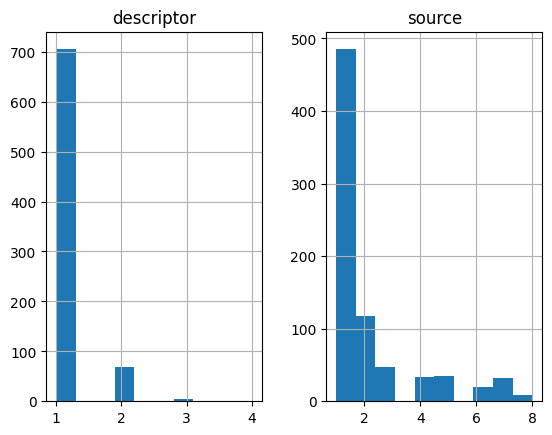

In [85]:
agg.hist